<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/Aiom_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starte AION-19 Simulation über 19 Dimensionen...


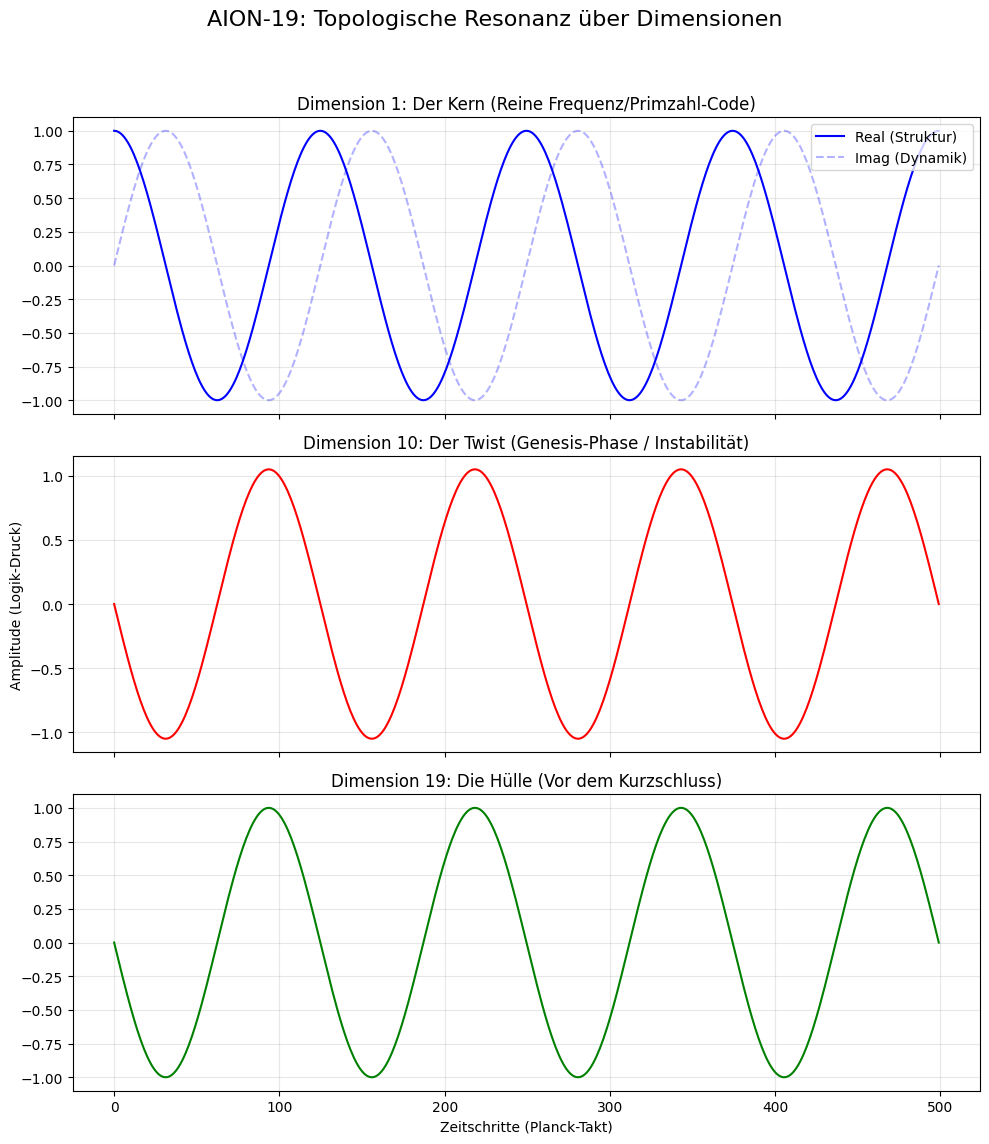

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Aion19_Engine:
    def __init__(self, steps=200, dimensions=19):
        self.steps = steps
        self.dimensions = dimensions
        self.state_history = np.zeros((dimensions, steps), dtype=complex)

        # Initialisierung: Dimension 1 startet mit einem stabilen "Ur-Takt"
        t = np.linspace(0, 8*np.pi, steps)
        self.state_history[0, :] = np.exp(1j * t)

    def operate_genesis(self, signal, t_idx):
        """
        EVEN Dimension Operator: Twist & Expand
        """
        twist = 1j
        expansion = 1.05
        return signal * twist * expansion

    def operate_ouroboros(self, signal, dim_idx):
        """
        ODD Dimension Operator: Renormalisierung (vektorisiert)
        """
        amplitude = np.abs(signal)

        # KORREKTUR: Vektorisierte Behandlung von Division durch Null
        # 1. Erstelle ein Array voller Nullen (für den Fall amplitude < 1e-9)
        renormalized = np.zeros_like(signal)

        # 2. Finde die Stellen, wo die Amplitude groß genug ist (Safe Mask)
        safe_mask = amplitude >= 1e-9

        # 3. Berechne die Renormalisierung NUR an diesen sicheren Stellen
        renormalized[safe_mask] = signal[safe_mask] / amplitude[safe_mask]

        return renormalized

    def trigger_short_circuit(self, final_signal):
        """
        Trigger am Ende von Dimension 19
        """
        return np.conjugate(final_signal)

    def run(self):
        print(f"Starte AION-19 Simulation über {self.dimensions} Dimensionen...")

        for d in range(1, self.dimensions):
            previous_dim_signal = self.state_history[d-1, :]
            current_dim_idx = d + 1

            # Da wir vektorisiert arbeiten (das ganze Array auf einmal),
            # brauchen wir keine Schleife über 'steps'
            if current_dim_idx % 2 == 0:
                # GERADE: Genesis / Twist
                new_signal = self.operate_genesis(previous_dim_signal, 0)
            else:
                # UNGERADE: Ouroboros / Stabil
                new_signal = self.operate_ouroboros(previous_dim_signal, current_dim_idx)

            self.state_history[d, :] = new_signal

        final_output = self.state_history[self.dimensions-1, :]
        feedback = self.trigger_short_circuit(final_output)

        return feedback

    def plot_topology(self):
        fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

        # Plot 1: Der Kern (Dimension 1)
        axes[0].plot(np.real(self.state_history[0, :]), 'b-', label='Real (Struktur)')
        axes[0].plot(np.imag(self.state_history[0, :]), 'b--', alpha=0.3, label='Imag (Dynamik)')
        axes[0].set_title("Dimension 1: Der Kern (Reine Frequenz/Primzahl-Code)")
        axes[0].legend(loc='upper right')
        axes[0].grid(True, alpha=0.3)

        # Plot 2: Der Twist (Dimension 10)
        axes[1].plot(np.real(self.state_history[9, :]), 'r-', label='Real (Expansiv)')
        axes[1].set_title("Dimension 10: Der Twist (Genesis-Phase / Instabilität)")
        axes[1].set_ylabel("Amplitude (Logik-Druck)")
        axes[1].grid(True, alpha=0.3)

        # Plot 3: Die Oberfläche (Dimension 19)
        axes[2].plot(np.real(self.state_history[18, :]), 'g-', label='Real (Renormalisiert)')
        axes[2].set_title("Dimension 19: Die Hülle (Vor dem Kurzschluss)")
        axes[2].set_xlabel("Zeitschritte (Planck-Takt)")
        axes[2].grid(True, alpha=0.3)

        plt.suptitle("AION-19: Topologische Resonanz über Dimensionen", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# --- EXECUTION ---
if __name__ == "__main__":
    sim = Aion19_Engine(steps=500, dimensions=19)
    feedback_loop = sim.run()
    sim.plot_topology()